In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData

%matplotlib inline

In [92]:
def plot_reward(engine, max_reward):
    
    with engine.connect() as connection:
        result = connection.execute("select raw_reward from Game")
        raw_reward = [r[0] for r in result]

    # Max reward for default gridworld is -2
    fig, ax = plt.subplots()
    df = pd.DataFrame(raw_reward, columns=["raw reward"])
    df["max reward"] = max_reward * np.ones(df.shape[0])
    _ = df["raw reward"].plot(ax=ax, legend=True, marker=".")
    _ = df["max reward"].plot(ax=ax, linestyle="--", legend=True)
    
    return raw_reward, fig, ax

# 16-step hallway

In [103]:
engine =  create_engine('sqlite:///hallway_data.db',
                         connect_args={'check_same_thread': False},
                         execution_options = {"isolation_level": "AUTOCOMMIT"})

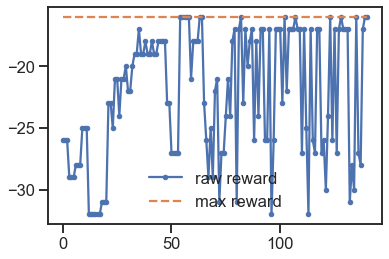

In [104]:
_ = plot_reward(engine, -16)

# 5x5 gridworld 

In [38]:
engine = create_engine(f'sqlite:///gridworld_data.db',
                       connect_args={'check_same_thread': False},
                       execution_options = {"isolation_level": "AUTOCOMMIT"})

In [47]:
_ = plot_reward(engine, -2)